<a id="top"></a>
# <font color=red>Team123</font> Project Final Report

### MGT 6203 | Group Project
#### *Wesam Shawqi Alnasr; walnasr3 (OMSA)* <br>*Chris Collins; ccollins87 (OMSA)*<br>*Sai Phani Krishna Punyakoti; spunyakoti3 (OMSA)*



### Contents:
#### [Section 1: Overview of the Project](#project)
#### [Section 2: Overview of the Data](#data)
#### [Section 2: Model Building](#model)
#### [Appendix](#appendix)

<a id="project"></a>
# <font color=blue> Part 1: Overview of The Project </font>

# Title: HR Analytics Case Study

## Introduction
&emsp;&emsp;Human capital comes first before any other factors contributing to business success. The negative impact on this capital through employee continuous attrition affects projects’ completion, employee morale and organization reputation. If attrition is at a higher than desirable rate, it would be a problem for an organization to keep up with. It results in delay of project deliverables, becomes expensive to hire new talent and get them up to speed. In this project, we apply data analysis and logistic regression techniques to identify potential causes and predict the probability of employee attrition. 

&emsp;&emsp; In this project, we predict the probability of employee attrition by exploring some affecting factors like: age, education level, monthly income, job level, gender, worklife balance, performance ratings and others. Studying such topics in the business context is important as human capital comes first before any other factors computing to business success. This is due to the negative impact on projects' completion, employee morale, reputaion, and eventually the business health.


## Problem statement

&emsp;&emsp; Given employee attributes and work related data, predict how likely an employee would leave the organization.
  
## Approach

&emsp;&emsp; In this project, we do exploratory data analysis and use statistical techniques to understand the summary of data, identify any issues with the data such as mis-aligned data types, null values in some columns, outliers, distribution skewness, calculate correlations of dependent/independent variables etc. We then do data preprocessing to address all the issues discovered in the analysis phase. This may involve imputing nulls, addressing outliers, cleaning data (type conversions etc).<br>
&emsp;&emsp;We intend to train logistic regression or other classficiaton models on a train set of the data to predict the probaility of employee attrition on validation data using cross validation. We will further tweak the model to improve the performance and avoid any issues such as overfitting etc and evaluate the final model on test data.
We will also report the most signifacnt attributes that can be used to predict Attrition of an employee. These insights would be very useful for business to take proactive measures to reduce attrition.

## Research on the case
&emsp;&emsp;According to **"This fixable problem costs U.S. businesses One trillion USD"** article by Wigert S.M.F. and B., The cost of replacing an individual employee can range from one-half to two times the employee's annual salary.
The attrition case is more than money according to Library, C (Chally.com) in the article **"The real cost of employee turnover"**. It affects project delays, institutional knowledge, company culture, lost productivity, opportunity cost and workload on remaining employees. Library, C. also found that there are 42 days on average to fill open positions, additional recruiting and training costs when seeking to hire new candidates.

&emsp;&emsp;We also went ahead and explored experts opinion about the attrition causes and the possible retention methods to reduce numbers of emplyees leaving the companies. According to Al-Suraihi, W. A., et.al. in the article **"Employee Turnover: Causes, Importance, and Retention Strategies"**, causes of turnover may include (in-order): training and feedback, job-related factors, trust, job stress, challenging work, job satisfaction, working environment, family pressure, salary, group size and leaders and managers. In the same articles, it is found that the following strategies (in-order) can be implemented to help retaining employees: management, training, job involvement, job satisfaction, rewards and benefits, job engagement, work environment and employee participation.     


## Initial Hypotheses

- Age: Younger employees tend to leave more frequently than older 
- Monthly Earnings: employees who earn more are less likely to leave 
- Work Life Balance: employees who rate themselves as having poor work life balance are more likely to leave than others 
- Gender: employee gender does not make an employee more or less likely to leave 
- Business Travel: employees who travel more frequently are more likely to leave the company than those who do not travel frequently
- Environment Satisfaction: employees who rate their environmental satisfaction as low are more likely to leave than those who - - rate their environmental satisfaction higher 

<a id="data"></a>
# <font color=blue> Section 2: Overview of The Data </font>

In [51]:
## Load libraries and set options
library(ggplot2)
library(caret)
library(dplyr)
library(car)
library(tidyverse)
library(repr)
library(ROSE)
library(randomForest)
library(e1071)
library(pROC)
options(repr.plot.width=4, repr.plot.height=3)

## About the Datasets

&emsp;&emsp; The datasets were downloaded from kaggle.com for an imaginary company with more than 4000 employees. About 16% of company employees leave every year and should be replaced from the job market. The company management requested this study to introduce some remedial interventions to the company organization to increase retention rates and convince employees to stay. The datasets include general data about employees, employee survey data and manager survey data.

** Source: ** https://www.kaggle.com/datasets/vjchoudhary7/hr-analytics-case-study 

#### General Data:
This dataset contains demographic, education and other employment data of the employees.

In [52]:
general_df <- read.csv("general_data.csv")
emp_survey <- read.csv("employee_survey_data.csv")
mgr_survey <- read.csv("manager_survey_data.csv")
glimpse(general_df)

Observations: 4,410
Variables: 24
$ Age                     <int> 51, 31, 32, 38, 32, 46, 28, 29, 31, 25, 45, 3…
$ Attrition               <fct> No, Yes, No, No, No, No, Yes, No, No, No, No,…
$ BusinessTravel          <fct> Travel_Rarely, Travel_Frequently, Travel_Freq…
$ Department              <fct> Sales, Research & Development, Research & Dev…
$ DistanceFromHome        <int> 6, 10, 17, 2, 10, 8, 11, 18, 1, 7, 17, 28, 14…
$ Education               <int> 2, 1, 4, 5, 1, 3, 2, 3, 3, 4, 2, 1, 4, 1, 3, …
$ EducationField          <fct> Life Sciences, Life Sciences, Other, Life Sci…
$ EmployeeCount           <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ EmployeeID              <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…
$ Gender                  <fct> Female, Female, Male, Male, Male, Female, Mal…
$ JobLevel                <int> 1, 1, 4, 3, 1, 4, 2, 2, 3, 4, 2, 1, 1, 1, 1, …
$ JobRole                 <fct> Healthcare Representative, Research Scientist…
$ MaritalStatus   

#### Employee Survey Data:
This dataset contains the employee satisfaction, Job Satisfaction and work life balance scores. Each of these scores range from 1 to 4. 1 being ‘Low’ and 4 being ‘Very High’

In [53]:
glimpse(emp_survey)

Observations: 4,410
Variables: 4
$ EmployeeID              <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…
$ EnvironmentSatisfaction <int> 3, 3, 2, 4, 4, 3, 1, 1, 2, 2, 3, NA, 4, 1, 4,…
$ JobSatisfaction         <int> 4, 2, 2, 4, 1, 2, 3, 2, 4, 1, 4, 4, 1, 2, 4, …
$ WorkLifeBalance         <int> 2, 4, 1, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 2, 2, …


#### Manager Survey Data:
This contains the Job involvement (1 to 4) and Performance rating (1 to  4) of an employee.

In [54]:
glimpse(mgr_survey)

Observations: 4,410
Variables: 3
$ EmployeeID        <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, …
$ JobInvolvement    <int> 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, …
$ PerformanceRating <int> 3, 4, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, …


All the above datasets contain a total of 4,410 unique employees. Some variables are categorical with either integer or character values. 

## Data Cleaning and Preparation
For analysis and building models, we need to have data in certain format. Data cleaning/preparation is one of the most crucial steps because the model has to be trained on clean data that does not contain any errors or null values. We did some of the important steps in data cleaning process and there are few more to do as we progress.

### Merging Dataframes
We merged the above datasets to get a single dataset. In this dataframe, each row is a full represntation of a single employee with all respective attributes combined from all three data sets. We merge these on "EmployeeID" column using inner join.

In [55]:
df = merge(x = emp_survey, y = general_df, by = 'EmployeeID')
df = merge(x = df, y = mgr_survey, by = 'EmployeeID')
glimpse(df)

Observations: 4,410
Variables: 29
$ EmployeeID              <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…
$ EnvironmentSatisfaction <int> 3, 3, 2, 4, 4, 3, 1, 1, 2, 2, 3, NA, 4, 1, 4,…
$ JobSatisfaction         <int> 4, 2, 2, 4, 1, 2, 3, 2, 4, 1, 4, 4, 1, 2, 4, …
$ WorkLifeBalance         <int> 2, 4, 1, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 2, 2, …
$ Age                     <int> 51, 31, 32, 38, 32, 46, 28, 29, 31, 25, 45, 3…
$ Attrition               <fct> No, Yes, No, No, No, No, Yes, No, No, No, No,…
$ BusinessTravel          <fct> Travel_Rarely, Travel_Frequently, Travel_Freq…
$ Department              <fct> Sales, Research & Development, Research & Dev…
$ DistanceFromHome        <int> 6, 10, 17, 2, 10, 8, 11, 18, 1, 7, 17, 28, 14…
$ Education               <int> 2, 1, 4, 5, 1, 3, 2, 3, 3, 4, 2, 1, 4, 1, 3, …
$ EducationField          <fct> Life Sciences, Life Sciences, Other, Life Sci…
$ EmployeeCount           <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ Gender          

### Data Type conversions
From data dictionary, we understand that the below listed columns are in fact factors but are denoted as integers and characters. Hence, we will convert those datatypes to make them factor variables
<br>
&emsp;&emsp;**Factor variables denoted as characters:**<br> &emsp;&emsp;"Attrition","BusinessTravel","Department","EducationField","Gender","JobLevel","MaritalStatus"
<br>
&emsp;&emsp;**Factor variables denoted as integers:**<br>
&emsp;&emsp;"Education", "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance", "JobInvolvement", "PerformanceRating", "StockOptionLevel"
<br><br>
&emsp;&emsp;**Label mapping for numeric factors:**<br>
&emsp;&emsp;The above listed features have numeric representation of levels. However, we will map those to their descriptions based on the data dictionary as mentioned below. This helps us in understanding the relations between these independent variables and Attrition in much better sense.
<br>
&emsp;&emsp;&emsp;&emsp;**Education:** 1-Below College; 2-College, 3-Bachelor, 4-Master, 5-Doctor<br>
&emsp;&emsp;&emsp;&emsp;**EnvironmentSatisfaction:** 1-Low; 2-Medium, 3-High, 4-Very High<br>
&emsp;&emsp;&emsp;&emsp;**WorkLifeBalance:** 1-Bad; 2-Good, 3-Better, 4-Best<br>
&emsp;&emsp;&emsp;&emsp;**PerformanceRating:** 1-Low; 2-Good, 3-Excellent, 4-Outstanding<br>
&emsp;&emsp;&emsp;&emsp;**JobSatisfaction:** 1-Low; 2-Medium, 3-High, 4-Very High<br>
&emsp;&emsp;&emsp;&emsp;**JobInvolvement:** 1-Low; 2-Medium, 3-High, 4-Very High<br>

In [56]:
#convert categorical variables to factors
factor_vars <- c("Attrition","BusinessTravel","Department","EducationField","Gender","JobLevel","MaritalStatus")
df[factor_vars] <- lapply(df[factor_vars], factor)

#Education
df$Education <- df$Education %>%
  str_replace('1','Below College') %>%
  str_replace('2','College') %>%
  str_replace('3','Bachelor') %>%
  str_replace('4','Master') %>%
  str_replace('5','Doctor')
df$Education <- ordered(df$Education, levels = c("Below College", "College", "Bachelor","Master","Doctor")) 

#EnvironmentSatisfaction
df$EnvironmentSatisfaction <- df$EnvironmentSatisfaction %>%
  str_replace('1','Low') %>%
  str_replace('2','Medium') %>%
  str_replace('3','High') %>%
  str_replace('4','Very High')
df$EnvironmentSatisfaction <- ordered(df$EnvironmentSatisfaction, levels = c("Low", "Medium", "High","Very High"))

#WorkLifeBalance
df$WorkLifeBalance <- df$WorkLifeBalance %>%
  str_replace('1','Bad') %>%
  str_replace('2','Good') %>%
  str_replace('3','Better') %>%
  str_replace('4','Best')
df$WorkLifeBalance <- ordered(df$WorkLifeBalance, levels = c("Bad", "Good", "Better","Best"))

#PerformanceRating
df$PerformanceRating <- df$PerformanceRating %>%
  str_replace('1','Low') %>%
  str_replace('2','Good') %>%
  str_replace('3','Excellent') %>%
  str_replace('4','Outstanding')
df$PerformanceRating <- ordered(df$PerformanceRating, levels = c("Low", "Good", "Excellent","Outstanding"))

#JobSatisfaction
df$JobSatisfaction <- df$JobSatisfaction %>%
  str_replace('1','Low') %>%
  str_replace('2','Medium') %>%
  str_replace('3','High') %>%
  str_replace('4','Very High')
df$JobSatisfaction <- ordered(df$JobSatisfaction, levels = c("Low", "Medium", "High","Very High"))

#JobInvolvement
df$JobInvolvement <- df$JobInvolvement %>%
  str_replace('1','Low') %>%
  str_replace('2','Medium') %>%
  str_replace('3','High') %>%
  str_replace('4','Very High')
df$JobInvolvement <- ordered(df$JobInvolvement, levels = c("Low", "Medium", "High","Very High"))

#drop EmployeeID
df2 = df[-c(1)]

## Initial Insights/Discoveries
&emsp;&emsp; We splitted the data into training (3,101) and testing (1,309) groups. we performed uni-variate, bi-variate and multi-variate analysis to understand the relationshsip between **attrition** and independent variables. We also carried out several steps to understand the distribution of attributes, identify presence of outliers etc. We then generated several plots to further explore the data at hand and here are our findings: 

In [57]:
set.seed(24)
sample <- sample(c(TRUE, FALSE), nrow(df2), replace=TRUE, prob=c(0.7,0.3))
train  <- df2[sample, ]
test   <- df2[!sample, ]

### Dependent Variable: Attrition
We must first understand the distribution of the dependent variable to see how balanced/imbalanced is our dataset as far as the dependent variable is concerned.

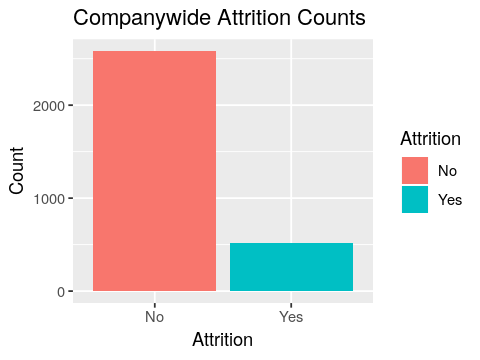

In [58]:
attr_table <- train %>%
    group_by(Attrition)%>%
    summarise(Count=n())
ggplot(attr_table, aes(x=Attrition, y=Count, fill=Attrition),  ylab="Count") +
  geom_bar(stat='identity') + 
  ggtitle("Companywide Attrition Counts")

**Inference:** The above plot indicates that the **attrition rate is 16.8%** in the training datset. Based on this, we can conclude that although the class imbalance is not extreme, it is not a balanced dataset either.
<br>
There are total **521** records of employees who left the company vs **2580** records of employee who did not leave.

**After removing nulls, the total size of train data has become 3026.**

## Bi-variate analysis:
We will now perform bi-variate analysis to understand the relationship between different independent variables to the dependent variable(Attrition). This helps us determine to what extent it becomes easier to know and predict the value of dependent variable if we know the value of independent variable.

### Age vs Attrition

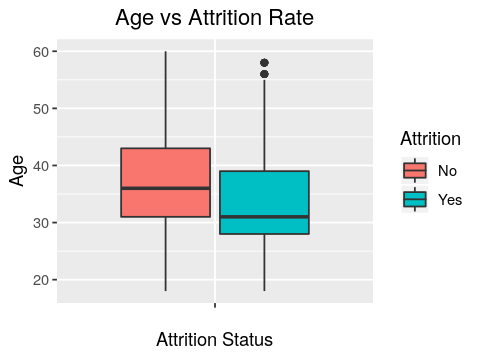

In [59]:
ggplot(data = train, aes(x = "", y = Age, fill=Attrition)) + 
  geom_boxplot() + ggtitle("Age vs Attrition Rate") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  xlab("Attrition Status")

**Inference**: The above plot indicates that the younger employees are more likely to leave the company than the older employees.<br>
### Monthly Income Vs Attrition rate
We will further explore the relation between monthly income and attrition rate

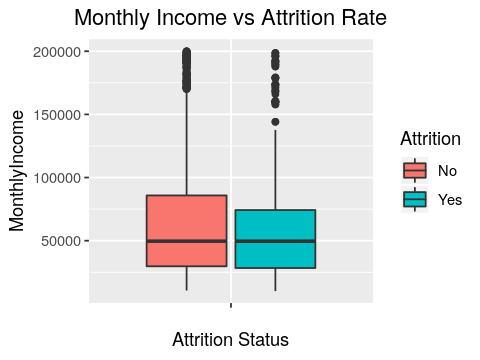

In [60]:
ggplot(data = train, aes(x = "", y = MonthlyIncome, fill=Attrition)) + 
  geom_boxplot() + ggtitle("Monthly Income vs Attrition Rate") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  xlab("Attrition Status")

**Inference:** Monthtly income seems to have many outliers. The above boxplot, however, indicates that there is no significant impact of Monthly Income on Attrition rate
<br>
### JobLevel vs Attrition

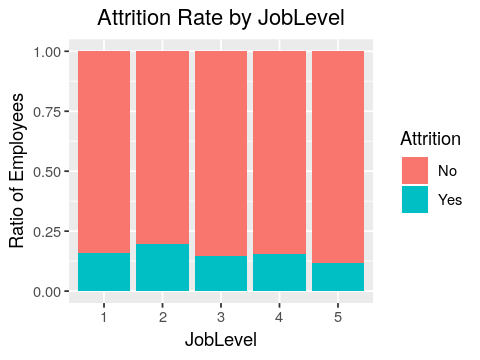

In [61]:
ggplot(train, aes(fill=Attrition, x=JobLevel)) +
  geom_bar(position="fill") + ggtitle("Attrition Rate by JobLevel") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  ylab("Ratio of Employees")

**Inference:** The above plot indicates that the attrition is mostly similar across job levels but it is bit lower in higher job level, i.e., 5. This tells that JobLevel doesn't affect Attrition so much.
<br>
### Gender vs Attrition

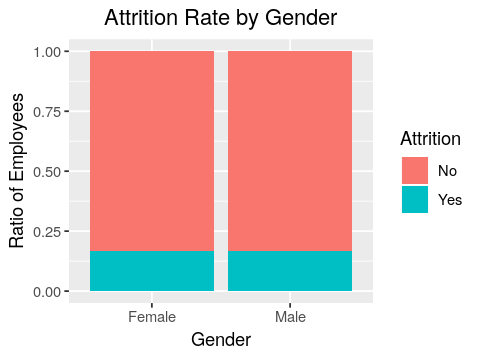

In [62]:
ggplot(train, aes(fill=Attrition, x=Gender)) +
  geom_bar(position="fill") + ggtitle("Attrition Rate by Gender") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  ylab("Ratio of Employees")

**Inference:** The above plot indicates that Gender does not seem to have any impact on employee attrrition

### WorkLife Balance vs Attrition

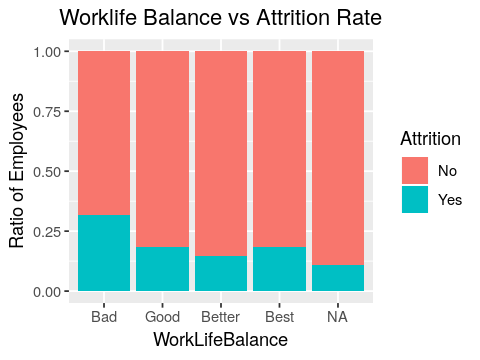

In [63]:
ggplot(train, aes(fill=Attrition, x=WorkLifeBalance)) +
  geom_bar(position="fill") + ggtitle("Worklife Balance vs Attrition Rate") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  ylab("Ratio of Employees")

**Inference:** Employees who rated to have a **Bad** worklife balance tend to leave more likely than others.

### Environment status vs Attrition

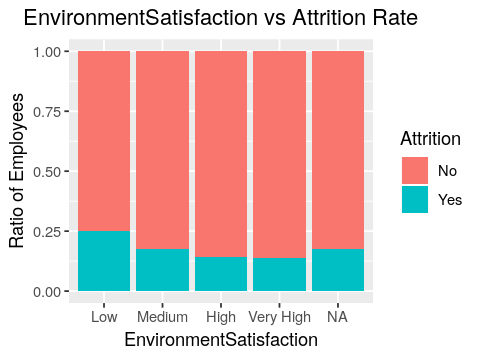

In [64]:
ggplot(train, aes(fill=Attrition, x=EnvironmentSatisfaction)) +
  geom_bar(position="fill") + ggtitle("EnvironmentSatisfaction vs Attrition Rate") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  ylab("Ratio of Employees")

**Inference:** Employees who have low work environment satisfaction tend to leave the company more likely than those than who have a better work environment satisfaction.

### Business Travel vs Attrition

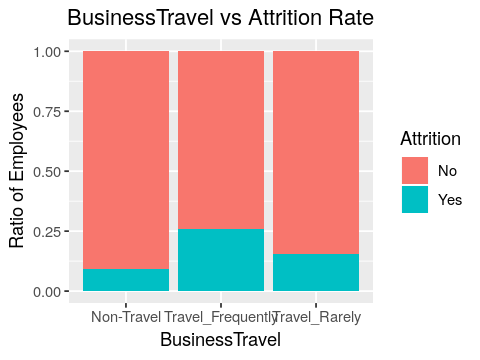

In [65]:
ggplot(train, aes(fill=Attrition, x=BusinessTravel)) +
  geom_bar(position="fill") + ggtitle("BusinessTravel vs Attrition Rate") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  ylab("Ratio of Employees")

**Inference:** The above plot indicates that those who travel more frequently are more likely to leave the company than those who do not.

## Interesting findings

- Although those who rated that they have **Bad** worklife balance tend to have higher attrition, those who rated that they have **Best** worklife balance have the second highest attrition rate.
- It is interesting to find that employees rated **outstanding** for their performance have higher attrition rate than those who rated below.
- It is interesting to know that **Gender** has no impact on attrition rate. Being a male or female doesnot make any one more likely or less likely to leave the company.

### Dropping Obviously Insignificant features
- **EmployeeID** column is unique to each record and hence it does not play any role in model building. 
- **Over18** has only one value - "Y" and hence doesn't play any significant role in modeling Attrition
- **EmployeeCount** has the same value for all records and hence it doesn't play any role in modeling Attrition
- **StandardHours** are same for all employees and hence it doesn't affect attrition
<br>
- The below listed features doesn't seem to have a strong relationship to Attrition and hence doesn't affect the same:
> "Gender", "DistanceFromHome", "Education", "JobLevel", "NumCompaniesWorked", "PercentSalaryHike", "TrainingTimesLastYear", "YearsSinceLastPromotion", "YearsWithCurrManager", "PerformanceRating"

### Final selected features
We have finally selected the below list of features that we can consider for modeling. This include: <br>
> 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'Attrition', 
'BusinessTravel', 'Department', 'EducationField',  'JobRole', 'MaritalStatus', 'MonthlyIncome', 
'YearsAtCompany',  'JobInvolvement'

- We will now select only the above listed features in our training and test datasets.

In [74]:
train_orig <- train
selected_cols = c('EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'Attrition', 
                  'BusinessTravel', 'Department', 'JobRole', 'MaritalStatus', #'MonthlyIncome', 
                  'YearsAtCompany',  'JobInvolvement') 
train = train[selected_cols]
test = test[selected_cols]

## Feature Engineering

### Find & Treat Nulls in the Data

In [89]:
## Find missing data
names(which(colSums(is.na(train))>0))

character(0)

We observed that the **'EnvironmentSatisfaction' 'JobSatisfaction' 'WorkLifeBalance'** columns has null values. <br><br>Since the proportion of missing data is very minimal and also we do not have the business understanding of why the data is missing, we cannot meaningfully impute the nulls. Hence as a regular imputing practice, we will impute the missing values in categorical data by the most frequent value in the column i.e., we will do model imputation for all the above features (since they are all categorical). We will do similar treatment to nulls in testdata. 
<br>In real-life, however, we will impute the missing data using strategic imputations based on domain understanding and business knowledge

In [76]:
ES_vals <- unique(train$EnvironmentSatisfaction[!is.na(train$EnvironmentSatisfaction)])
ES_mode <- ES_vals[which.max(tabulate(match(train$EnvironmentSatisfaction, ES_vals)))]

JS_vals <- unique(train$JobSatisfaction[!is.na(train$JobSatisfaction)])
JS_mode <- JS_vals[which.max(tabulate(match(train$JobSatisfaction, JS_vals)))]

WLB_vals <- unique(train$WorkLifeBalance[!is.na(train$WorkLifeBalance)])
WLB_mode <- WLB_vals[which.max(tabulate(match(train$WorkLifeBalance, WLB_vals)))]

train$EnvironmentSatisfaction[is.na(train$EnvironmentSatisfaction)] <- ES_mode
train$JobSatisfaction[is.na(train$JobSatisfaction)] <- JS_mode
train$WorkLifeBalance[is.na(train$WorkLifeBalance)] <- WLB_mode


test$EnvironmentSatisfaction[is.na(test$EnvironmentSatisfaction)] <- ES_mode
test$JobSatisfaction[is.na(test$JobSatisfaction)] <- JS_mode
test$WorkLifeBalance[is.na(test$WorkLifeBalance)] <- WLB_mode

names(which(colSums(is.na(train))>0))
names(which(colSums(is.na(test))>0))

character(0)

character(0)

**All the nulls in train data and test data are now imputed and there are no nulls in both the datasets.** 
#### Distribution of Attrition variable in train set

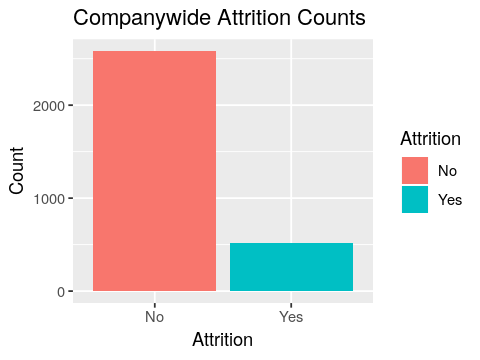

In [29]:
attr_table_tr <- train %>%
    group_by(Attrition)%>%
    summarise(Count=n())
ggplot(attr_table_tr, aes(x=Attrition, y=Count, fill=Attrition),  ylab="Count") +
  geom_bar(stat='identity') + 
  ggtitle("Companywide Attrition Counts")

### UnderSampling
As we discussed earlier, this dataset is imbalanced with minority data is only of 16%. Hence we need to work out the strategies such as random under sampling or over sampling. In this we try undersampling to make the model learn from the patterns of the attrition data.

In [77]:
us_train <- ovun.sample(Attrition ~ ., data = train, method = "under", N=1500, seed = 32)$data

#### Distribution of Attrition in train data after undersampling

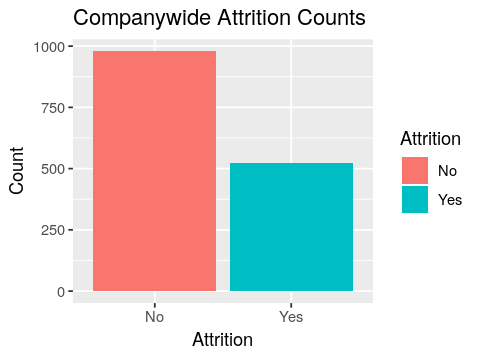

In [31]:
attr_table_us <- us_train %>%
    group_by(Attrition)%>%
    summarise(Count=n())
ggplot(attr_table_us, aes(x=Attrition, y=Count, fill=Attrition),  ylab="Count") +
  geom_bar(stat='identity') + 
  ggtitle("Companywide Attrition Counts")

After undersampling the majority class, we achieved a proportion of **35% Attrition data** in the undersampled training data. We will not do any under or oversampling to the test data.= since it represents the real-life proportion, which is imbalanced.

<a id="model"></a>
# <font color=blue> Section 3: Model Building </font>

### Logistic Regression
We will first try the most popular and simple classfication algorithm, which is, the Logistic Regression algorithm

In [32]:
#fit logistic regression model to the training data
lr_model <- glm(Attrition~., family = binomial(link='logit'), data=us_train)
lr_model <- step(lr_model)

Start:  AIC=1693.55
Attrition ~ EnvironmentSatisfaction + JobSatisfaction + WorkLifeBalance + 
    Age + BusinessTravel + Department + JobRole + MaritalStatus + 
    YearsAtCompany + JobInvolvement

                          Df Deviance    AIC
- JobInvolvement           3   1640.9 1692.9
<none>                         1635.5 1693.5
- JobRole                  8   1655.4 1697.4
- Department               2   1646.7 1700.7
- YearsAtCompany           1   1654.5 1710.5
- WorkLifeBalance          3   1662.8 1714.8
- Age                      1   1661.3 1717.3
- EnvironmentSatisfaction  3   1667.3 1719.3
- JobSatisfaction          3   1668.5 1720.5
- BusinessTravel           2   1674.8 1728.8
- MaritalStatus            2   1680.6 1734.6

Step:  AIC=1692.94
Attrition ~ EnvironmentSatisfaction + JobSatisfaction + WorkLifeBalance + 
    Age + BusinessTravel + Department + JobRole + MaritalStatus + 
    YearsAtCompany

                          Df Deviance    AIC
<none>                         164

The best model based on stepwise selection has selected the below attributes
>'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'BusinessTravel', 'Department', 'JobRole', 'MaritalStatus', 'YearsAtCompany'

and dropped

>'JobInvolvement'

### Summary of Logistic Regression model

In [33]:
summary(lr_model)


Call:
glm(formula = Attrition ~ EnvironmentSatisfaction + JobSatisfaction + 
    WorkLifeBalance + Age + BusinessTravel + Department + JobRole + 
    MaritalStatus + YearsAtCompany, family = binomial(link = "logit"), 
    data = us_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9801  -0.8345  -0.5512   0.9925   2.8858  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       0.504713   0.492355   1.025 0.305316    
EnvironmentSatisfaction.L        -0.676964   0.122156  -5.542 2.99e-08 ***
EnvironmentSatisfaction.Q         0.057811   0.122803   0.471 0.637809    
EnvironmentSatisfaction.C         0.083579   0.124101   0.673 0.500642    
JobSatisfaction.L                -0.643487   0.123247  -5.221 1.78e-07 ***
JobSatisfaction.Q                 0.050809   0.123722   0.411 0.681316    
JobSatisfaction.C                -0.262710   0.123949  -2.120 0.034048 *  
WorkLifeBalance.L              

**Inference:** The above model summary indicates that the bewlow listed group variables are not statistically significant at 95% confidence intervals.
> 'EnvironmentSatisfaction.Q', 'EnvironmentSatisfaction.C', 'JobSatisfaction.Q', 'JobSatisfaction.C', 'WorkLifeBalance.C', 'MaritalStatusMarried'

### Check for Multicollinearity

In [34]:
vif(lr_model)

,GVIF,Df,GVIF^(1/(2*Df))
EnvironmentSatisfaction,1.073840,3,1.011944
JobSatisfaction,1.080427,3,1.012976
WorkLifeBalance,1.088139,3,1.014178
Age,1.121989,1,1.059240
BusinessTravel,1.069108,2,1.016846
Department,1.076150,2,1.018517
JobRole,1.217089,8,1.012355
MaritalStatus,1.071810,2,1.017488
YearsAtCompany,1.102727,1,1.050108


**Inference:** Based on the above table and the VIF score, we can say that there is no multicollinearity between the dependent variables which is good for our model.

#### Confusion Matrix & ROC curve - of Logistic Regression Model

In [35]:
pred_probs <- predict(lr_model, type='response', newdata = test)
y_pred = ifelse(pred_probs > 0.5, 1, 0)
table(test$Attrition, y_pred > 0.5)

     
      FALSE TRUE
  No    953  166
  Yes   100   90

Setting levels: control = No, case = Yes
Setting direction: controls < cases


[1] "AUC value for logistic regression:  0.765232115140398"


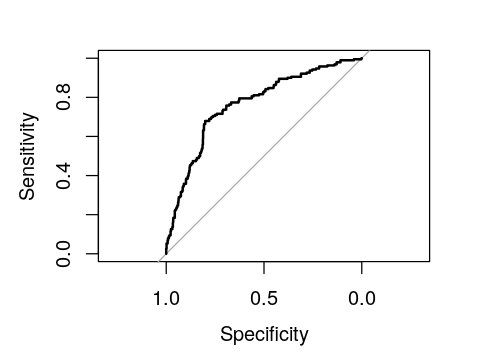

In [36]:
roc <- roc(test$Attrition, pred_probs)
plot(roc)
print(paste("AUC value for logistic regression: ",roc$auc))

### Decision Tree

#### Train & Test

In [37]:
library(rpart)
dt_model = rpart(Attrition ~ ., data = us_train, method = 'class')
new_data = test[,-which(names(test)=="Attrition")]
dt_pred_probs = predict(dt_model, newdata = new_data, type='prob')[,2]
dt_preds <- ifelse(dt_pred_probs > 0.6, 1, 0)

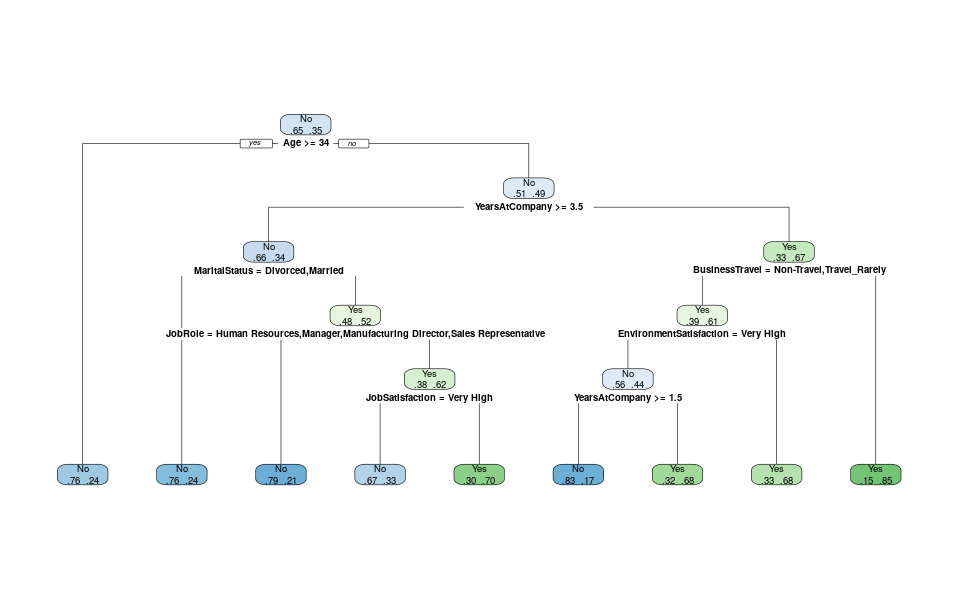

In [38]:
library(rpart.plot)
options(repr.plot.width=8, repr.plot.height=5)
rpart.plot(dt_model, extra=4)

#### Confusion Matrix & ROC curve - of Decision Tree Model

In [39]:
table(test$Attrition, dt_preds)

     dt_preds
         0    1
  No  1000  119
  Yes  107   83

Setting levels: control = No, case = Yes
Setting direction: controls < cases


[1] "AUC value for Decison Tree Classifier:  0.671217252245896"


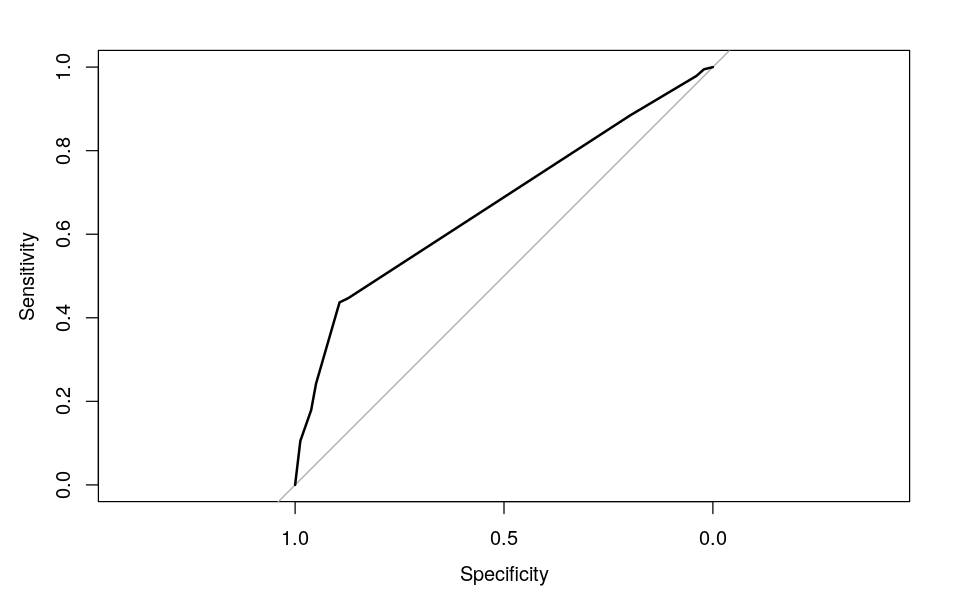

In [40]:
roc_dt <- roc(test$Attrition, dt_pred_probs)
plot(roc_dt)
print(paste("AUC value for Decison Tree Classifier: ",roc_dt$auc))

### RandomForest

#### Train & Test

In [41]:
set.seed(24)
rf_model <- randomForest(factor(Attrition) ~ ., data = us_train)
rf_pred_probs <- predict(rf_model, new_data, type="prob")[,2]
rf_preds <- ifelse(rf_pred_probs > 0.6, 1, 0)

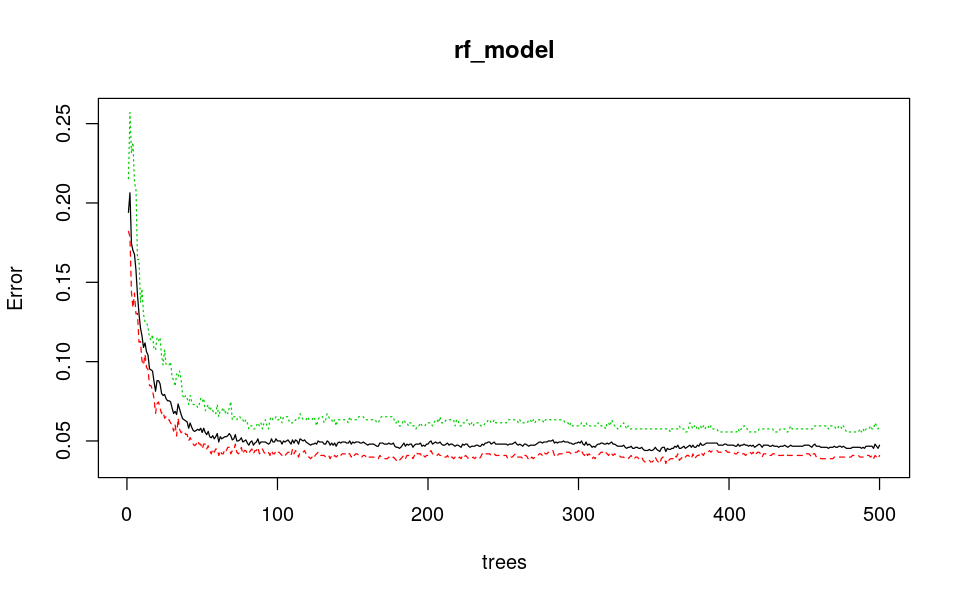

In [42]:
plot(rf_model)

#### Confusion Matrix & ROC curve - of Random Forest model

In [43]:
table(test$Attrition, rf_preds)

     rf_preds
         0    1
  No  1094   25
  Yes    8  182

Setting levels: control = No, case = Yes
Setting direction: controls < cases


[1] "AUC value for Random Forest Classifier:  0.981317906025116"


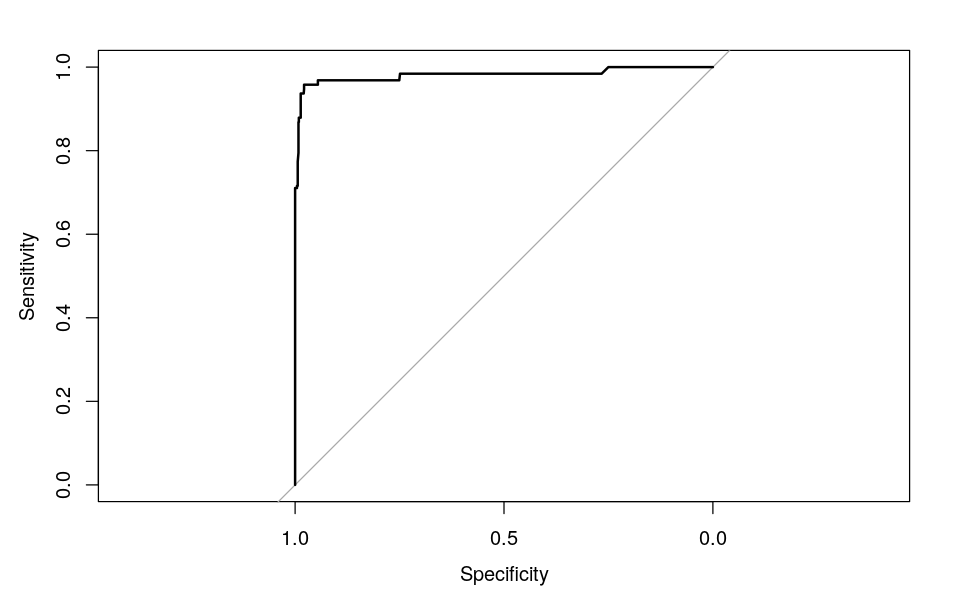

In [44]:
roc_rf <- roc(test$Attrition, rf_pred_probs)
plot(roc_rf)
print(paste("AUC value for Random Forest Classifier: ",roc_rf$auc))

### Parameter tuning

Random Forest 

1500 samples
  10 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1200, 1200, 1200, 1200, 1200 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa     
   1    0.6606667  0.02988239
   3    0.9000000  0.77082275
   5    0.9193333  0.82063051
   8    0.9180000  0.81874552
  10    0.9206667  0.82494923
  15    0.9186667  0.82103992

Kappa was used to select the optimal model using the largest value.
The final value used for the model was mtry = 10.


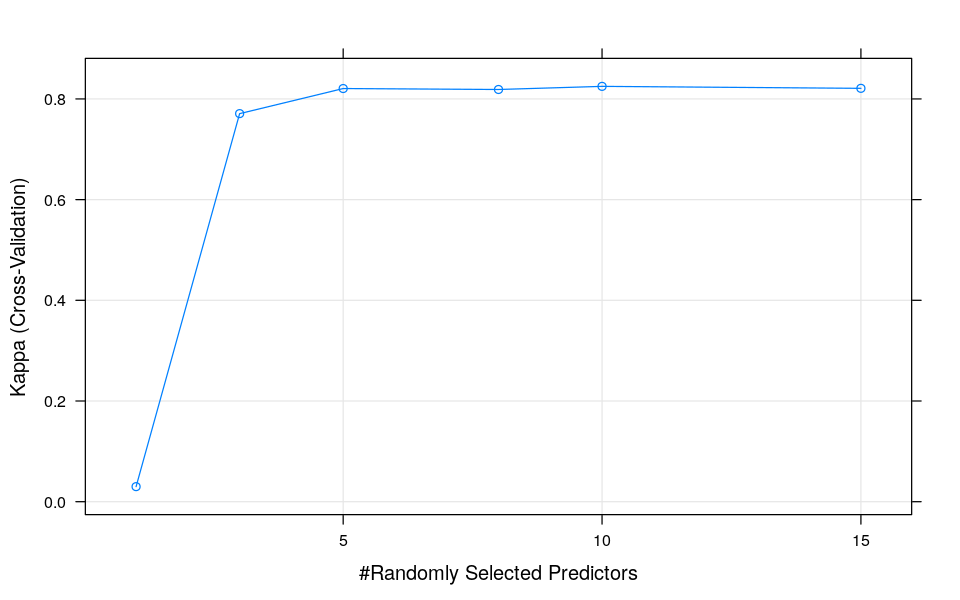

In [45]:
control <- trainControl(method="cv", number=5, classProbs = TRUE)
set.seed(24)
rfgrid <- expand.grid(.mtry=c(1,3,5,8,10,15))
rf_gridsearch <- train(factor(Attrition) ~ ., data = us_train, method="rf", metric="Kappa", tuneGrid=rfgrid, trControl=control)
print(rf_gridsearch)
plot(rf_gridsearch)

**Best value for mtry from grid search**

In [46]:
rf_gridsearch$bestTune$mtry

[1] 10

#### Confusion Matrix & ROC Curve - of tuned Random Forest

In [47]:
rf_grid_pred_probs <- predict(rf_gridsearch, new_data, type="prob")[,2]
rf_grid_preds <- ifelse(rf_grid_pred_probs > 0.6, 1, 0)
table(test$Attrition, rf_grid_preds)

     rf_grid_preds
         0    1
  No  1090   29
  Yes   10  180

Setting levels: control = No, case = Yes
Setting direction: controls < cases


[1] "AUC value for best Tuned Random Forest Classifier:  0.979824561403509"


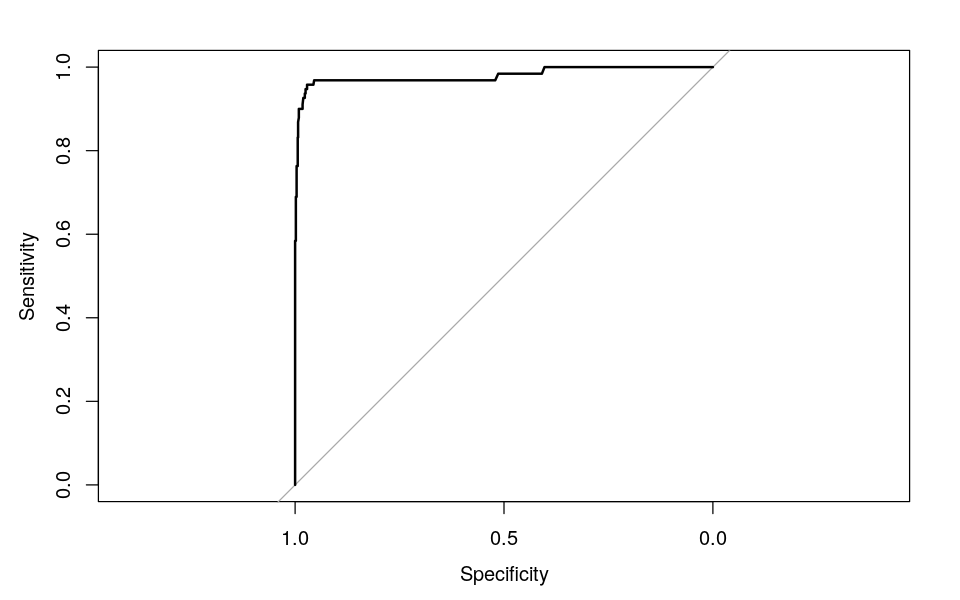

In [48]:
roc_rf_grid <- roc(test$Attrition, rf_grid_pred_probs)
plot(roc_rf_grid)
print(paste("AUC value for best Tuned Random Forest Classifier: ",roc_rf_grid$auc))

## Conclusions

&emsp;&emsp;In this business case, we were interested in knowing the probability of employees leaving the company thourgh the different variables selected for the problem. Therefore, we applied three different models (logistic regression, decision trees and random forest) to help us classify employees to leaving and staying categories. 

&emsp;&emsp;As seen, random forest performed the best over logistic regression and decision trees. It is important to highlight that the models were trained on undersampled data and evaluated on un-touched test data. We also selected Area Under Curve (AUC) over accuracy as a metric for model evaluation.

&emsp;&emsp;Looks like there are non-linear relationships in the data and hence random forest algorithm has performed better than the Logistic regression

Company XYZ is currently experiencing around 16% annual employee attrition. This costs the company a tremendous amount of money each year. The analysis and insights gained from predictive models can guide the company to make strategic investments to lower employee attrition. 

The logistic regression model and decision tree model show employees who rated themselves with low levels of **environmental satisfaction**, **job satisfaction**, and **work life balance** are more likely to leave the company. Additionally, younger employees (**age**) who are single tend to leave the company at a higher rate. 

As a result of these findings, we suggest management look for ways to retain their younger employees and make the work environment more engaging while making it easier for employees to find work life balance. The following list covers ideas and rationale that points back to the findings of the models.

1. Create a management training program open to internal employees. Research from Abdullah Al-suraihi et. al suggest training is one of the best ways to retain talent in a company (Abdullah Al-suraihi et. al, 2021). This type of training program targets younger employees (**age**) and allows them to envision a future within the company while equipping them with the skills needed to perform better in their job, likely increasing their **job satisfaction**. 
2. Give employees flexibility in their schedule. This could be a department wide work from home day or allow employees flex time (or a variation of flex time) where employees are allowed to select the hours they work. This intervention targets the **work life balance** the models indicated are significant. 
3. Provide employees the opportunity to get to know each other better. Organize catered lunches or happy hours in the office that promote department synergy and lead to improved levels of **environmental satisfaction**. 


Implementing change within an organization can be costly and concerning to managers and employees. The models suggest that providing targeted interventions aimed at improving the areas highlighted by the models will improve employee attrition and help the bottom line of the company.  




## Literature Resources
- Al-Suraihi, W. A., Samikon, S. A., Al-Suraihi, A.-H. A., &amp; Ibrahim, I. (2021). Employee turnover: Causes, importance and  retention strategies. European Journal of Business and Management Research, 6(3), 1–10. https://doi.org/10.24018/ejbmr.2021.6.3.893 

- Library, C. (2022, April 28). The real cost of employee turnover&nbsp;. Chally. Retrieved July 2, 2022, from 
https://chally.com/blog/causes-and-cost-of-unwanted-turnover/#:~:text=Once%20an%20ideal%20candidate%20is,%242%2C792%20and%20%244%2C425%20per%20employee 

- Wigert, S. M. F. and B. (2019, March 13). This fixable problem costs U.S. businesses $1 trillion. Gallup.com. Retrieved July 1, 2022, from https://www.gallup.com/workplace/247391/fixable-problem-costs-businesses-trillion.aspx#:~:text=The%20cost%20of%20replacing%20an,to%20%242.6%20million%20per%20year 


## Work cited section
- https://en.wikipedia.org/wiki/Bivariate_analysis
- https://www.kaggle.com/datasets/vjchoudhary7/hr-analytics-case-study?select=general_data.csv

<a id="appendix"></a>
# Appendix

## Bi-variate analysis between other attributes and Attrition
### Performance Rating vs Attrition

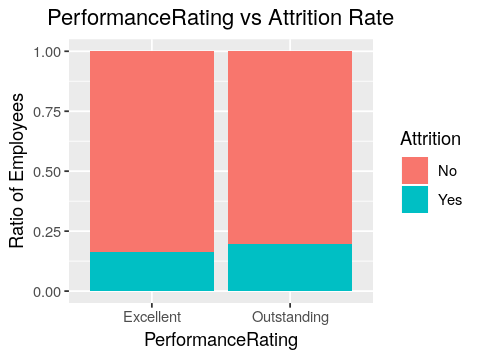

In [78]:
ggplot(train_orig, aes(fill=Attrition, x=PerformanceRating)) +
  geom_bar(position="fill") + ggtitle("PerformanceRating vs Attrition Rate") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  ylab("Ratio of Employees")


**Inference:** The above plot indicates that there is a slight chance that people who are rated higher tend to leave the company more likely than others

### Education vs Attrition

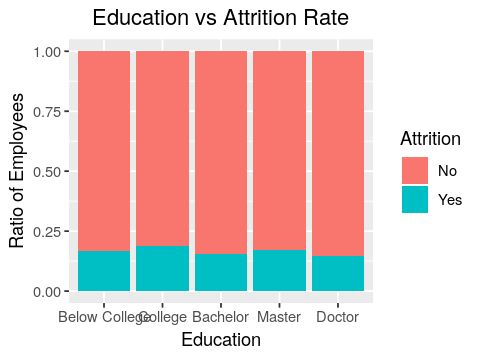

In [79]:
ggplot(train_orig, aes(fill=Attrition, x=Education)) +
  geom_bar(position="fill") + ggtitle("Education vs Attrition Rate") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  ylab("Ratio of Employees")

**Inference:** The above plot indicates that there is no strong relation between Education and attrition. Hence we can say that Education does not afftect the Attrition.

### EducationField vs Attrition

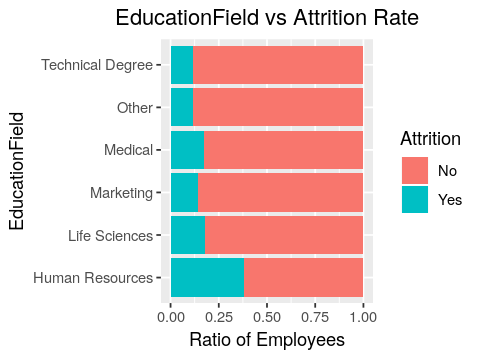

In [82]:
ggplot(train_orig, aes(fill=Attrition, x=EducationField)) +
  geom_bar(position="fill") + ggtitle("EducationField vs Attrition Rate") + 
  theme(plot.title = element_text(hjust = 0.5))  + labs(y="Ratio of Employees") + coord_flip()

**Inference:** The above plot indicates that the employees who studied Human Resources are more likely to leave the company than others.

### Marital Status vs Attrition

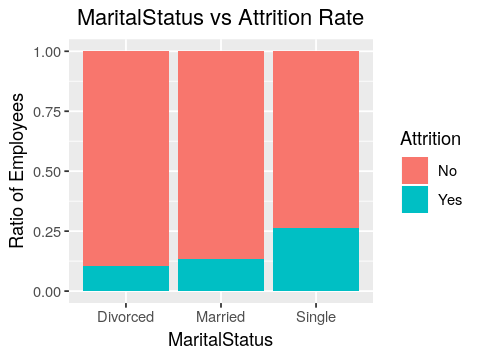

In [83]:
ggplot(train_orig, aes(fill=Attrition, x=MaritalStatus)) +
  geom_bar(position="fill") + ggtitle("MaritalStatus vs Attrition Rate") + 
  theme(plot.title = element_text(hjust = 0.5)) + ylab("Ratio of Employees")

**Inference:** The single employees are more likely to leave the company than the Married or Divorced employees.

### Distance From Home vs Attrition

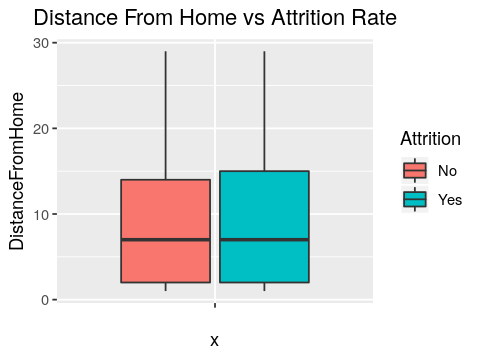

In [84]:
ggplot(data = train_orig, aes(x = "", y = DistanceFromHome, fill=Attrition)) + 
  geom_boxplot() + ggtitle("Distance From Home vs Attrition Rate") + 
  theme(plot.title = element_text(hjust = 0.5))

**Inference:** The above plot indicates that distance from home does not affect the Attrition.

### Department vs Attrition

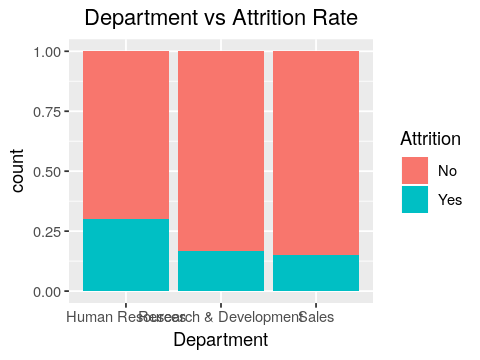

In [85]:
ggplot(train_orig, aes(fill=Attrition, x=Department)) +
  geom_bar(position="fill") + ggtitle("Department vs Attrition Rate") + 
  theme(plot.title = element_text(hjust = 0.5))

**Inference:** The above plot indicates that the employees in Human Resources department are more likely to leave the company than those in other departments

### Job Role vs Attrition

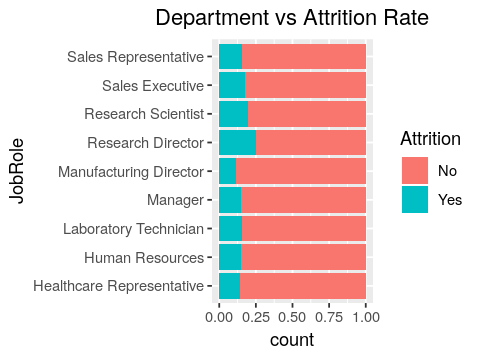

In [86]:
ggplot(train_orig, aes(fill=Attrition, x=JobRole)) +
  geom_bar(position="fill") + ggtitle("Department vs Attrition Rate") + 
  theme(plot.title = element_text(hjust = 0.5)) + coord_flip()

**Inference:** Based on the above chart, it is evident that the employees with JobRole as **Reasearch Director** are more likely to leave the company than others.

### Years At Company vs Attrition

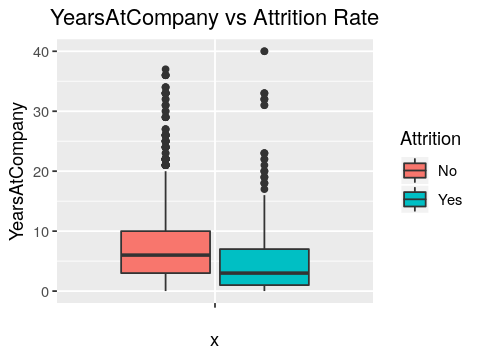

In [87]:
ggplot(data = train_orig, aes(x = "", y = YearsAtCompany, fill=Attrition)) + 
  geom_boxplot() + ggtitle("YearsAtCompany vs Attrition Rate") + 
  theme(plot.title = element_text(hjust = 0.5))

**Inference:** The avg. years company is very low for emoplyees who left the company than those who stay. This also indicates that if an employee has stayed with the company for more than 5 years, he/she is very less likely to leave the company.

### JobInvolvement vs Attrition

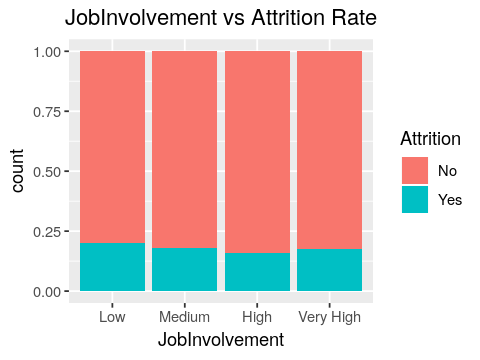

In [88]:
ggplot(train_orig, aes(fill=Attrition, x=JobInvolvement)) +
  geom_bar(position="fill") + ggtitle("JobInvolvement vs Attrition Rate") + 
  theme(plot.title = element_text(hjust = 0.5))

**Inference:** Employees with lower job involvement tent to leave the company more likely than those with higher job involvement.